In [1]:
import tensorflow as tf
print('tensorflow version:', tf.__version__)
from tensorflow import keras
print('keras version:', keras.__version__)
tf.test.gpu_device_name()
tf.test.is_gpu_available()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


tensorflow version: 2.9.2
keras version: 2.9.0
Num GPUs Available:  1


In [2]:
import os
import math
import numpy as np
import pandas as pd
import random
import cv2  # pip3 install opencv-python
from scipy import ndimage
import zipfile
import tensorflow_datasets as tfds
import os.path
import matplotlib.pyplot as plt
from matplotlib import cm
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
f='/content/drive/MyDrive/BIGDataUPV/TFM/Chest X-Ray (Pneumonia,Covid-19,Tuberculosis)/'
batch_size = 32
img_height = 128
img_width = 128

In [5]:
"""x_train=np.load(f+'traindata.npy')
train_label=np.load(f+"traindata_label.npy")"""

'x_train=np.load(f+\'traindata.npy\')\ntrain_label=np.load(f+"traindata_label.npy")'

In [6]:
"""class_names = ['COVID19','NORMAL','PNEUMONIA','TUBERCULOSIS']

BATCH_SIZE = 1
plt.figure()
print (train_ds.take(1))
for images, labels in train_ds.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))
    break

for images, labels in train_ds.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")"""

'class_names = [\'COVID19\',\'NORMAL\',\'PNEUMONIA\',\'TUBERCULOSIS\']\n\nBATCH_SIZE = 1\nplt.figure()\nprint (train_ds.take(1))\nfor images, labels in train_ds.take(1):\n    plt.imshow(images[0].numpy().astype("uint8"))\n    break\n\nfor images, labels in train_ds.take(1):\n    for i in range(1):\n        ax = plt.subplot(3, 3, i + 1)\n        plt.imshow(images[i].numpy().astype("uint8"))\n        plt.title(class_names[labels[i]])\n        plt.axis("off")'

In [7]:
"""from PIL import Image

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6.5))

normal=np.where(train_label==1)
num=0

for a in normal[0]:
  b1 = x_train[a]
  b1f=cv2.flip(b1,1)
  axes[0].imshow(b1, cmap=cm.Greys_r)
  axes[1].imshow(b1f, cmap=cm.Greys_r)
  rescaled = (255.0 / b1f.max() * (b1f - b1f.min())).astype(np.uint8)
  im = Image.fromarray(rescaled)
  im.save(f+'aux/normalflip'+str(num)+'.jpeg')
  num=num+1"""

"from PIL import Image\n\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6.5))\n\nnormal=np.where(train_label==1)\nnum=0\n\nfor a in normal[0]:\n  b1 = x_train[a]\n  b1f=cv2.flip(b1,1)\n  axes[0].imshow(b1, cmap=cm.Greys_r)\n  axes[1].imshow(b1f, cmap=cm.Greys_r)\n  rescaled = (255.0 / b1f.max() * (b1f - b1f.min())).astype(np.uint8)\n  im = Image.fromarray(rescaled)\n  im.save(f+'aux/normalflip'+str(num)+'.jpeg')\n  num=num+1"

In [8]:

def imagetofile(folder,file,val_sp,subset):
  batch_size2 = 7800
  if(os.path.isfile(file+'.npy')):
    print("OK")
    x_train=np.load(file+'.npy')
    train_label=np.load(file+"_label.npy")
    return x_train,train_label
  else:
    train_ds= tf.keras.utils.image_dataset_from_directory(
      folder,
      validation_split=val_sp,
      subset=subset, seed=123,
      shuffle=False,
      image_size=(img_height, img_width),
      batch_size=batch_size2)
    x_train =None
    train_label=None
    for image, label in tfds.as_numpy(train_ds):
      x_train = image
      train_label=label
    x_train = x_train.astype('float32') / 255.0
    np.save(file, x_train)
    np.save(file+"_label", train_label)
    return x_train,train_label


In [9]:
folder=f+'train'
x_train,train_label=imagetofile(folder,f+'traindata',0.001,"training")
"""train_ds= tf.keras.utils.image_dataset_from_directory(
  folder,
  validation_split=0.01,
  subset="training", seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)


x_train =None
train_label=None
for image, label in tfds.as_numpy(train_ds):
  x_train = image
  train_label=label


x_train = x_train.astype('float32') / 255.0"""


OK


'train_ds= tf.keras.utils.image_dataset_from_directory(\n  folder,\n  validation_split=0.01,\n  subset="training", seed=123,\n  shuffle=False,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n\n\nx_train =None\ntrain_label=None\nfor image, label in tfds.as_numpy(train_ds):\n  x_train = image\n  train_label=label\n\n\nx_train = x_train.astype(\'float32\') / 255.0'

In [10]:
folder2=f+'test'
x_test,test_label=imagetofile(folder2,f+'testdata',0.999,"validation")


"""test_ds = tf.keras.utils.image_dataset_from_directory(
  folder2,
  validation_split=0.99,
  subset="validation", seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

x_test =None
test_label=None
for image, label in tfds.as_numpy(test_ds):
  x_test = image
  test_label=label


x_test = x_test.astype('float32') / 255.0"""

OK


'test_ds = tf.keras.utils.image_dataset_from_directory(\n  folder2,\n  validation_split=0.99,\n  subset="validation", seed=123,\n  shuffle=False,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n\nx_test =None\ntest_label=None\nfor image, label in tfds.as_numpy(test_ds):\n  x_test = image\n  test_label=label\n\n\nx_test = x_test.astype(\'float32\') / 255.0'

In [11]:
folder2=f+'val'
x_val,val_label=imagetofile(folder2,f+'valdata',0.999,"validation")

"""folder3=f+'val'
val_ds = tf.keras.utils.image_dataset_from_directory(
  folder3,
  validation_split=0.2,
  subset="validation", seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

x_val =None
val_label=None
for image, label in tfds.as_numpy(val_ds):
  x_val = image
  val_label=label


x_val = x_val.astype('float32') / 255.0"""

OK


'folder3=f+\'val\'\nval_ds = tf.keras.utils.image_dataset_from_directory(\n  folder3,\n  validation_split=0.2,\n  subset="validation", seed=123,\n  shuffle=False,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n\nx_val =None\nval_label=None\nfor image, label in tfds.as_numpy(val_ds):\n  x_val = image\n  val_label=label\n\n\nx_val = x_val.astype(\'float32\') / 255.0'

In [12]:
def conv_block_1(x, filters, ks = (3, 3)):
  x = keras.layers.Conv2D(filters=filters,
                          kernel_size=ks,
                          strides=(1, 1),
                          padding='same',
                          activation=None)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  return x

def cnn_1(input_shape = None, num_labels = None):
    if input_shape is None:
        raise Exception('input_shape must be provided as a tuple, e.g., (28, 28)')
    if num_labels is None:
        raise Exception('num_labels must be provided as an integer')
    inputs = keras.Input(shape = input_shape)
    x = inputs
    #x = conv_block_1(x, filters=16, ks=(5, 5))
    x = conv_block_1(x, filters=16, ks=(3, 3))
    #x = conv_block_1(x, filters=32, ks=(3, 3))
    x = conv_block_1(x, filters=64, ks=(3, 3))
    x = keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = conv_block_1(x, filters=128, ks=(3, 3))
    x = conv_block_1(x, filters=256, ks=(3, 3))
    x = keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = conv_block_1(x, filters=256, ks=(3, 3))
    x = conv_block_1(x, filters=256, ks=(3, 3))
    x = keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = conv_block_1(x, filters=512, ks=(3, 3))
    x = conv_block_1(x, filters=512, ks=(3, 3))
    x = keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = conv_block_1(x, filters=1024, ks=(3, 3))
    x = conv_block_1(x, filters=1024, ks=(3, 3))

    x = keras.layers.Flatten()(x)

    x = keras.layers.Dense(516)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    outputs = keras.layers.Dense(num_labels, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1.0e-5),
        loss='sparse_categorical_crossentropy',
        metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(),tf.keras.metrics.SparseCategoricalAccuracy()],
    )
    model.summary()
    return model

In [13]:
class_names = ['COVID19','NORMAL','PNEUMONIA','TUBERCULOSIS']
print(class_names)
print(len(class_names))


['COVID19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']
4


In [14]:
"""import matplotlib.pyplot as plt

BATCH_SIZE = 9
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")"""



'import matplotlib.pyplot as plt\n\nBATCH_SIZE = 9\nplt.figure(figsize=(10, 10))\nfor images, labels in train_ds.take(1):\n    for i in range(BATCH_SIZE):\n        ax = plt.subplot(3, 3, i + 1)\n        plt.imshow(images[i].numpy().astype("uint8"))\n        plt.title(class_names[labels[i]])\n        plt.axis("off")'

In [15]:
input_shape = (x_train.shape[1], x_train.shape[2], 3)
cnn = cnn_1(input_shape = input_shape, num_labels=len(class_names))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      9280      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                             

In [16]:
cnn.fit(x_train.reshape(x_train.shape), train_label,validation_data=(x_val,val_label) ,epochs=25, batch_size=100, shuffle=True)

Epoch 1/25
42/42 [==============================] - 46s 699ms/step - loss: 0.3612 - sparse_categorical_crossentropy: 0.3612 - sparse_categorical_accuracy: 0.8794 - val_loss: 1.9781 - val_sparse_categorical_crossentropy: 1.9781 - val_sparse_categorical_accuracy: 0.2432
Epoch 2/25
42/42 [==============================] - 20s 485ms/step - loss: 0.0437 - sparse_categorical_crossentropy: 0.0437 - sparse_categorical_accuracy: 0.9936 - val_loss: 2.7804 - val_sparse_categorical_crossentropy: 2.7804 - val_sparse_categorical_accuracy: 0.2432
Epoch 3/25
42/42 [==============================] - 21s 506ms/step - loss: 0.0202 - sparse_categorical_crossentropy: 0.0202 - sparse_categorical_accuracy: 0.9983 - val_loss: 3.5239 - val_sparse_categorical_crossentropy: 3.5239 - val_sparse_categorical_accuracy: 0.2432
Epoch 4/25
42/42 [==============================] - 22s 528ms/step - loss: 0.0132 - sparse_categorical_crossentropy: 0.0132 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.1370 - val_sparse

In [17]:
cnn.evaluate(x_test, test_label, batch_size=100)

8/8 [==============================] - 4s 540ms/step - loss: 0.3744 - sparse_categorical_crossentropy: 0.3744 - sparse_categorical_accuracy: 0.9052


[0.37443047761917114, 0.37443047761917114, 0.9051948189735413]

In [18]:
from matplotlib import pyplot
from sklearn.base import BaseEstimator
from sklearn import metrics
class MyArgmaxForPredictedLabels(BaseEstimator):
    def __init__(self, threshold = 0.5):
        self.threshold = threshold
        self._estimator_type = 'classifier'

    def fit(self, X, y):
        raise Exception('No fit implemented in this class')
        return self

    def predict(self, y_probs):
        assert type(y_probs) == np.ndarray
        assert len(y_probs.shape) == 1
        return y_probs

def show_results(y_true, y_pred, labels):
    _cm_ = metrics.confusion_matrix(y_true, y_pred)
    max_digits = int(math.log(_cm_.max())) + 1
    format_str = '%%%dd' % max_digits
    for i in range(_cm_.shape[0]):
        for j in range(_cm_.shape[1]):
            print(format_str % _cm_[i, j], end = ' ')
        print()
    print()

    print(metrics.classification_report(y_true, y_pred))
    #
    fig, axes = pyplot.subplots(nrows = 1, ncols = 2, figsize = (16, 7))
    #fig.suptitle(title)
    #
    metrics.ConfusionMatrixDisplay.from_estimator(estimator = MyArgmaxForPredictedLabels(),
                          X = y_pred, y = y_true,
                          normalize = 'true', ax = axes[0],
                          labels = labels,
                          cmap = 'Blues') #, colorbar = False)
    #
    metrics.ConfusionMatrixDisplay.from_estimator(estimator = MyArgmaxForPredictedLabels(),
                          X = y_pred, y = y_true,
                          normalize = 'pred', ax = axes[1],
                          labels = labels,
                          cmap = 'Oranges') #, colorbar = False)
    #
    pyplot.tight_layout()
    pyplot.show()
    del fig

8/8 [==============================] - 1s 165ms/step
   104      0      0      1 
     9    175     48      2 
     1     12    377      0 
     0      0      0     41 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       105
           1       0.94      0.75      0.83       234
           2       0.89      0.97      0.93       390
           3       0.93      1.00      0.96        41

    accuracy                           0.91       770
   macro avg       0.92      0.93      0.92       770
weighted avg       0.91      0.91      0.90       770



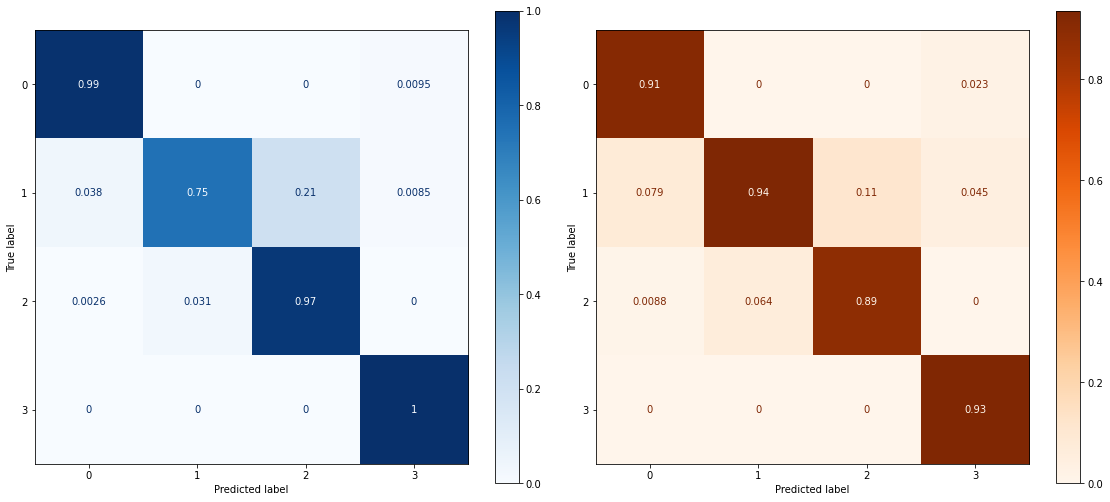

In [19]:
y_test_pred=cnn.predict(x_test, batch_size=100)
y_test_pred = y_test_pred.argmax(axis=1)

#print(test_label)
#print(y_test_pred)
#print(class_names)

show_results(y_true = test_label, y_pred = y_test_pred, labels = [0,1,2,3])

In [20]:
cnn.save(f+"cnnmodel")